<a href="https://colab.research.google.com/github/crisda100/AnalisisDatos/blob/master/RegresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Importamos Librerias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
### Cargamos Dataset
data = pd.read_csv('Car.csv')

In [ ]:
### Primeras 5 filas
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [ ]:
### Manipulamos data faltante
data.replace(0, np.nan, inplace=True)
data.fillna(data.mean(numeric_only=True), inplace=True)
data.fillna('NA',inplace=True)

In [ ]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
### Columnas dataframe
print(data.columns)

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')


<Axes: xlabel='km_driven'>

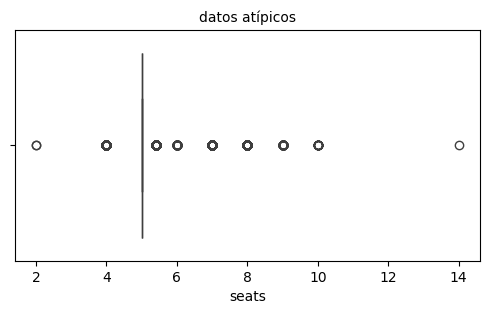

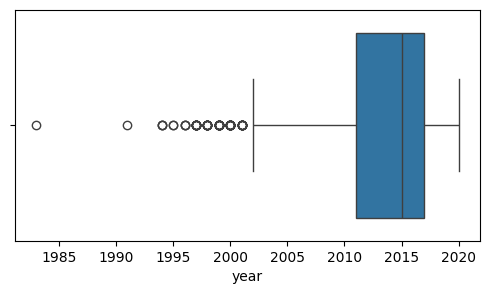

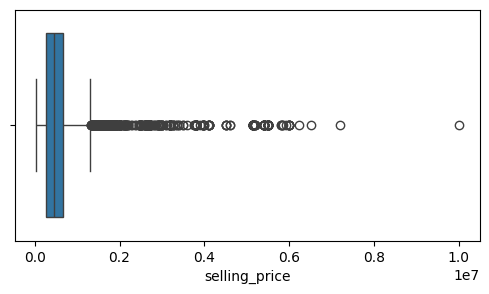

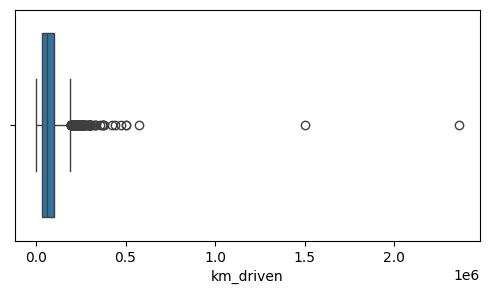

In [ ]:
### Realizamos EDA

# Variable - seats
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['seats'])
plt.title('datos atípicos', fontsize=10)

# Variable - year
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['year'])

# Variable - selling price
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['selling_price'])

# Variable - km_driven
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['km_driven'])

In [ ]:
### Ajustar columnas tipo object
data_num = data.copy()
for col in data_num:
    if data_num[col].dtype == 'object':
        label_encoder = LabelEncoder()
        data_num[col] = label_encoder.fit_transform(data_num[col])

In [ ]:
###  Data train y test
X = data_num.drop('selling_price', axis=1)
Y = data_num['selling_price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)


In [ ]:
### Data train
X_train.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
4313,704,2012,40000,3,1,1,0,251,10,255,32,5.0
5178,1464,2007,120000,3,1,0,0,23,51,128,240,5.0
758,500,2013,80000,3,1,1,2,281,114,191,407,5.0
7117,117,2016,100000,1,1,1,0,64,89,236,147,9.0
2606,1338,2013,77000,1,1,1,0,325,13,244,178,5.0


In [ ]:
### Data test
X_test.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
3558,776,2013,40000,1,1,1,0,305,24,294,221,5.0
233,976,2013,70000,1,1,1,0,46,95,103,315,7.0
7952,1258,2019,5000,3,1,0,0,299,119,220,425,5.0
572,1391,2004,120000,3,1,1,4,210,119,224,424,5.0
6960,809,2019,20000,3,0,0,0,315,83,153,197,5.0


In [38]:
### Se entrena el modelo regresion
model_regresion = LinearRegression()
model_regresion.fit(X_train, Y_train)

LinearRegression()

In [39]:
### Predicciones
pred = model_regresion.predict(X_test)

In [40]:
# Evaluar el modelo
print('Coeficientes:', model_regresion.coef_)
print('Error cuadrático medio:', mean_squared_error(Y_test, pred))
print('Coeficiente de determinación (R^2):', r2_score(Y_test, pred))

Coeficientes: [-1.00604821e+02  6.70144325e+04 -7.24706842e-01 -2.04606278e+05
 -3.05281213e+05 -9.90953009e+05 -1.50228853e+04 -1.86662938e+03
  1.41664748e+03  1.14532903e+02  6.34713937e+02 -9.44658378e+04]
Error cuadrático medio: 321949387814.72144
Coeficiente de determinación (R^2): 0.5124766820592632


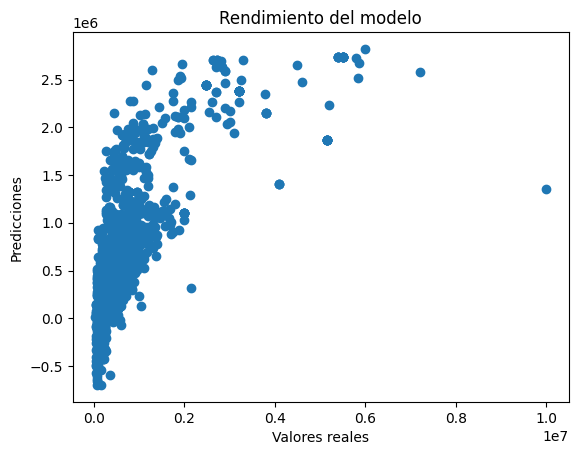

In [42]:
# Visualizar el rendimiento del modelo
plt.scatter(Y_test, pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Rendimiento del modelo")
plt.show()